<a href="https://colab.research.google.com/github/arsiyazamal/churn_prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data="https://raw.githubusercontent.com/deepakmoud/churnmodeling/main/Project7/Churn_Modelling.csv"

In [ ]:
#importing the dataset
dataset = pd.read_csv(data)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Our target column is 'Exited'
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

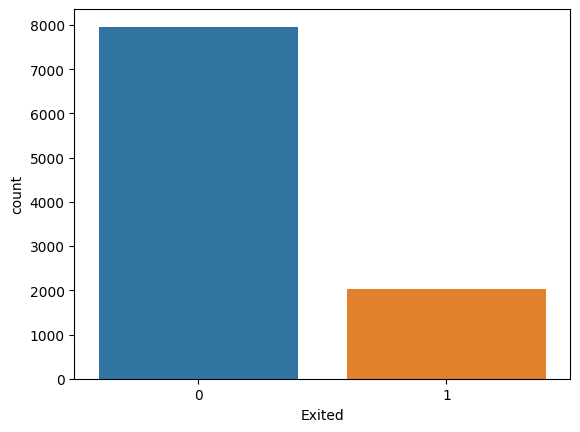

In [ ]:
sns.countplot(x=dataset['Exited'],data=dataset)

<Axes: xlabel='Gender', ylabel='count'>

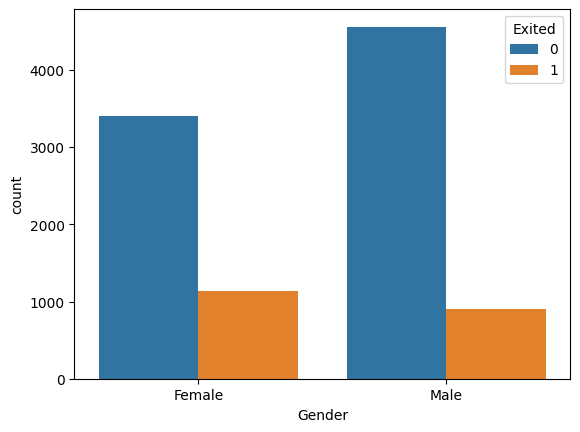

In [ ]:
sns.countplot(x=dataset['Gender'],data=dataset, hue="Exited")

<Axes: xlabel='Geography', ylabel='count'>

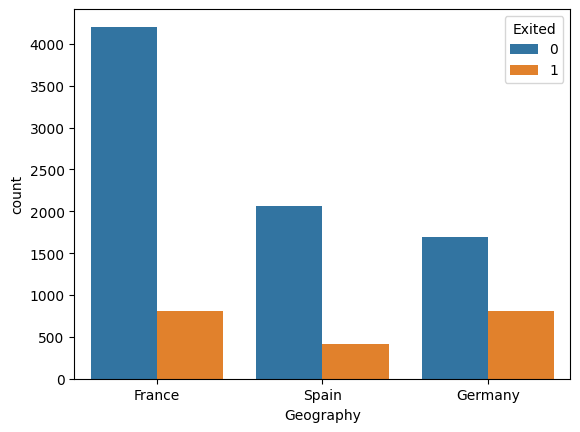

In [ ]:
sns.countplot(x=dataset['Geography'],data=dataset, hue="Exited")

In [ ]:
#checking null values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, 3:13].values
# Extracting dependent variable:
y = dataset.iloc[:, 13].values # this is for 1 d array coming up this will make it 2-d array

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(X_train)

[[667 2 0 ... 1 0 163830.64]
 [427 1 1 ... 1 1 57098.0]
 [535 0 0 ... 1 0 185630.76]
 ...
 [738 0 1 ... 1 0 181429.87]
 [590 2 0 ... 1 1 148750.16]
 [623 1 0 ... 1 0 118855.26]]


In [ ]:
# Feature Scaling
# Standard Scaling: Standardization = X'=X-mean(X)/standard deviation
# normal scaling : Normalization= X'=X-min(X)/max(x)-min(X)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)


In [ ]:
print(X_train_scaled)

[[ 0.16958176  1.51919821 -1.09168714 ...  0.64259497 -1.03227043
   1.10643166]
 [-2.30455945  0.3131264   0.91601335 ...  0.64259497  0.9687384
  -0.74866447]
 [-1.19119591 -0.89294542 -1.09168714 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.9015152  -0.89294542  0.91601335 ...  0.64259497 -1.03227043
   1.41231994]
 [-0.62420521  1.51919821 -1.09168714 ...  0.64259497  0.9687384
   0.84432121]
 [-0.28401079  0.3131264  -1.09168714 ...  0.64259497 -1.03227043
   0.32472465]]


In [ ]:
print(X_test_scaled)

[[-0.55204276  0.3131264  -1.09168714 ...  0.64259497  0.9687384
   1.61085707]
 [-1.31490297 -0.89294542 -1.09168714 ...  0.64259497 -1.03227043
   0.49587037]
 [ 0.57162971  1.51919821 -1.09168714 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-0.74791227  1.51919821  0.91601335 ...  0.64259497 -1.03227043
   0.71888467]
 [-0.00566991  0.3131264   0.91601335 ...  0.64259497  0.9687384
  -1.54507805]
 [-0.79945688  0.3131264   0.91601335 ...  0.64259497 -1.03227043
   1.61255917]]


In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier_decision.fit(X_train_scaled, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = classifier_decision.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 78.35


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier_decision,open('/content/drive/My Drive/project7_decision_model.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [ ]:
y_pred = classifier_svm.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 86.30


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier_svm,open('/content/drive/My Drive/project7_svm.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_Random = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier_Random.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [ ]:
y_pred = classifier_Random.predict(X_test_scaled)


In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 86.25


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier_Random,open('/content/drive/My Drive/project7_random_forest.pkl', 'wb'))
# Saving model to disk


[INFO] Saving model...


In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = classifier_knn.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 83.45


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier_knn,open('/content/drive/My Drive/project7_knn.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 82.75


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/project7_naive.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...
